In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
dir = os.getcwd()

In [ ]:
df = temp.dropna()

In [ ]:
df1 = df.drop(columns=['iron', 'copper', 'gold'])

In [ ]:
for a in df1.columns:
    df1[a] = df1[a].astype('float')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2003-02-01 to 2025-06-01
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bsi_inv_big    269 non-null    object 
 1   bsi_inv_small  269 non-null    object 
 2   3y             269 non-null    float64
 3   10y            269 non-null    float64
 4   shipment       269 non-null    object 
 5   inven          269 non-null    object 
 6   ipi            269 non-null    float64
 7   employ         269 non-null    object 
 8   durable        269 non-null    float64
 9   wti            269 non-null    float64
 10  dubai          269 non-null    float64
 11  y_spd          269 non-null    float64
dtypes: float64(7), object(5)
memory usage: 27.3+ KB


In [ ]:
df1

,bsi_inv_big,bsi_inv_small,3y,10y,shipment,inven,ipi,employ,durable,wti,dubai,y_spd
date,,,,,,,,,,,,
2003-02-01,99,98,4.730,5.150,56.009,43.439,61.7,59.6,37.2,35.92,30.20,0.420
2003-03-01,95,95,4.780,5.200,56.346,44.196,62.3,59.5,36.4,33.22,27.52,0.420
2003-04-01,87,91,4.600,5.030,55.752,44.925,62.4,59.2,36.3,28.36,23.56,0.430
2003-05-01,91,91,4.270,4.680,55.680,44.799,62.4,59.2,35.9,28.22,24.32,0.410
2003-06-01,87,90,4.070,4.460,57.136,45.114,63.3,59.2,34.5,30.72,25.67,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,91,87,2.611,2.830,99.9,106.6,113.4,63.0,110.6,71.54,76.32,0.219
2025-03-01,93,87,2.590,2.795,100.9,104.1,114.6,63.0,100.7,68.24,72.98,0.205
2025-04-01,94,86,2.395,2.658,101.8,104.0,113.8,63.1,99.1,63.61,68.49,0.263


In [ ]:
df1['y_spd'] = df1['10y'] - df1['3y']
df1['manu_spd'] = df1['shipment'] - df1['inven']

In [ ]:
df1_train = df1['2003-02-01':'2017-06-01']

In [ ]:
df1_test = df1['2017-07-01':]

In [ ]:
df2 = df1.drop(columns=['10y', '3y', 'wti', 'shipment', 'inven'])

In [ ]:
df2['bsi_inv'] = (df2['bsi_inv_big'] + df2['bsi_inv_small']) / 2

In [ ]:
df2.drop(columns=['bsi_inv_small', 'bsi_inv_big'], inplace=True)

In [ ]:
df2.drop(columns='ipi', inplace=True)

In [ ]:
df2

,employ,durable,dubai,y_spd,manu_spd,bsi_inv
date,,,,,,
2003-02-01,59.6,37.2,30.20,0.420,12.570,98.5
2003-03-01,59.5,36.4,27.52,0.420,12.150,95.0
2003-04-01,59.2,36.3,23.56,0.430,10.827,89.0
2003-05-01,59.2,35.9,24.32,0.410,10.881,91.0
2003-06-01,59.2,34.5,25.67,0.390,12.022,88.5
...,...,...,...,...,...,...
2025-02-01,63.0,110.6,76.32,0.219,-6.700,89.0
2025-03-01,63.0,100.7,72.98,0.205,-3.200,90.0
2025-04-01,63.1,99.1,68.49,0.263,-2.200,90.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2) #데이터 표준화

In [ ]:
cov_matrix = np.cov(df2_scaled, rowvar=False) #공분산 행렬 계산

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) #아이겐벡터, 밸류 계산

In [ ]:
principal_components = df2_scaled.dot(eigenvectors[:, 0])  # 첫 번째 주성분(PC1)

In [ ]:
# PC1 방향을 나타내는 벡터
pc1_vector = eigenvectors[:, 0]

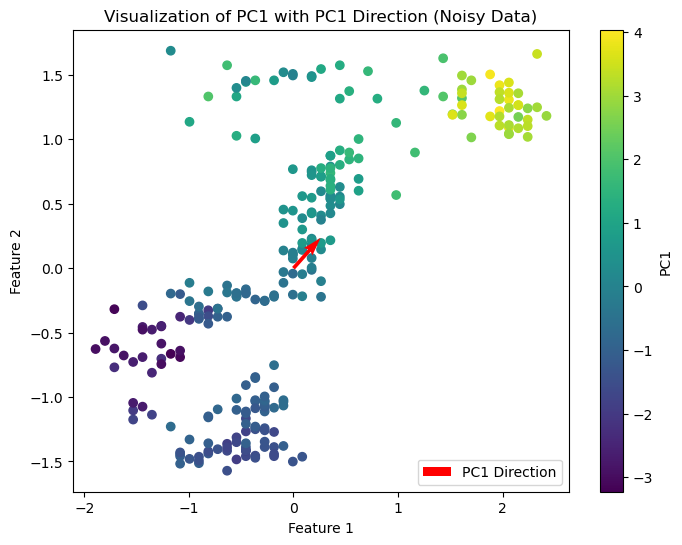

In [ ]:
# PC1 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df2_scaled[:, 0], df2_scaled[:, 1], c=principal_components, cmap='viridis')
plt.colorbar(label='PC1')
plt.quiver(0, 0, pc1_vector[0], pc1_vector[1], angles='xy', scale_units='xy', scale=2, color='red', label='PC1 Direction')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of PC1 with PC1 Direction (Noisy Data)')
plt.legend()
plt.show()

In [ ]:
cov_matrix_df = pd.DataFrame(cov_matrix, columns=df2.columns, index=df2.columns)
eigenvalues_df = pd.DataFrame({'Eigenvalues': eigenvalues}, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
eigenvectors_df = pd.DataFrame(eigenvectors, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                                index=df2.columns)
explained_variance_ratio_df = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio},
                                            index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
 
# 출력
print("공분산 행렬:\n", cov_matrix_df)
print("\n고유값:\n", eigenvalues_df)
print("\n고유벡터:\n", eigenvectors_df)


공분산 행렬:
             employ   durable     dubai     y_spd  manu_spd   bsi_inv
employ    1.003731  0.690466  0.096744 -0.637549 -0.837946 -0.250300
durable   0.690466  1.003731  0.172241 -0.338447 -0.764634 -0.309826
dubai     0.096744  0.172241  1.003731 -0.191608  0.035604  0.389391
y_spd    -0.637549 -0.338447 -0.191608  1.003731  0.514401  0.079313
manu_spd -0.837946 -0.764634  0.035604  0.514401  1.003731  0.536494
bsi_inv  -0.250300 -0.309826  0.389391  0.079313  0.536494  1.003731

고유값:
      Eigenvalues
PC1     3.108234
PC2     1.446704
PC3     0.098179
PC4     0.213681
PC5     0.457481
PC6     0.698111

고유벡터:
                PC1       PC2       PC3       PC4       PC5       PC6
employ    0.517859  0.119037 -0.534840  0.573729 -0.290145 -0.135090
durable   0.470130  0.065772 -0.176064 -0.628420 -0.291200  0.513755
dubai     0.036563  0.718987  0.008185  0.188886  0.528684  0.408005
y_spd    -0.377971 -0.290919 -0.016649  0.412996 -0.282897  0.722240
manu_spd -0.539062  0.114723 

In [ ]:
eigenvectors_df['PC1']

employ      0.517859
durable     0.470130
dubai       0.036563
y_spd      -0.377971
manu_spd   -0.539062
bsi_inv    -0.275705
Name: PC1, dtype: float64

In [ ]:
# explained_variance_ratio 계산
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nExplained Variance Ratio:\n", explained_variance_ratio_df)


Explained Variance Ratio:
      Explained Variance Ratio
PC1                  0.516113
PC2                  0.240221
PC3                  0.016302
PC4                  0.035481
PC5                  0.075963
PC6                  0.115919
